# Mobile Price Prediction using Decision Tree

#### Welcome to my first data science project "Mobile Price Classification" where I will be using Dataset from kaggle.com. This is my Data Science with Python Mini Project. I will use the following libraries:
    1. Scikit Learn
    2. Numpy
    3. Pandas
    4. Seaborn
    5. Matplotlib

# 

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) #countplot has future warning which is eliminated now

# 

### 2. Import Dataset

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# 

### 3. Analyse both train.csv as Dataframe 

In [3]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data_train.shape

(2000, 21)

In [5]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Let's plot heatmap, so that we find co relations between features with respect to price range 

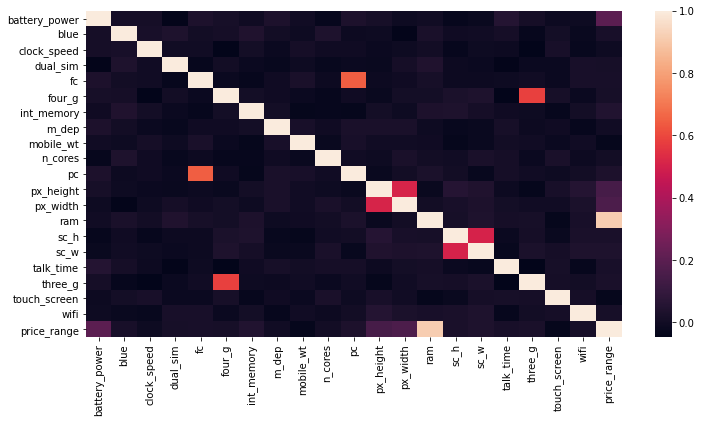

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data_train.corr())
plt.show()

From the above heatmap, we can notice that price range and ram share good relation. Let us plot relation between price range and ram

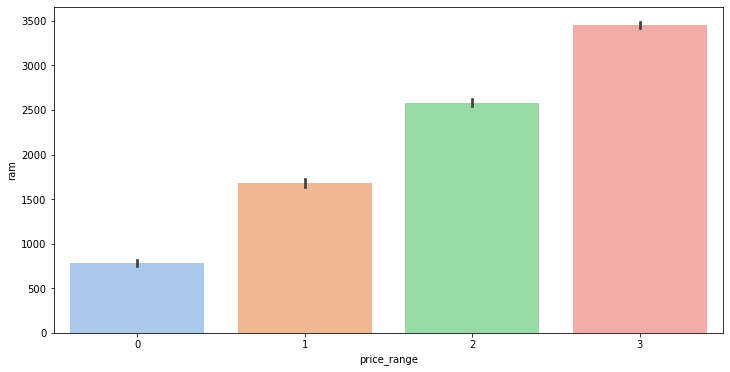

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range', y='ram', data=data_train, palette='pastel')
plt.show()

Lets plot relation between Price range with pixel height and pixel witdh 

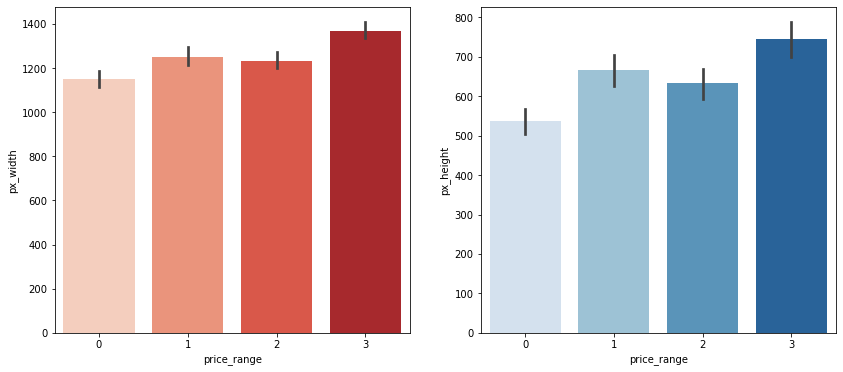

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='price_range', y='px_width', data=data_train, palette= 'Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range', y='px_height', data=data_train, palette= 'Blues')
plt.show()

Also, lets plot relation between price range and battery power

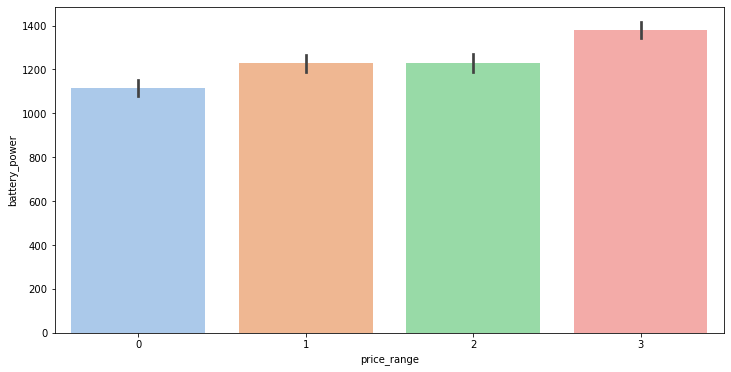

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range', y='battery_power', data=data_train, palette='pastel')
plt.show()

Now, plotting countplot for dataframe, where we can know how many mobile phones support 3G feature and we will do same for 4G Feature as well

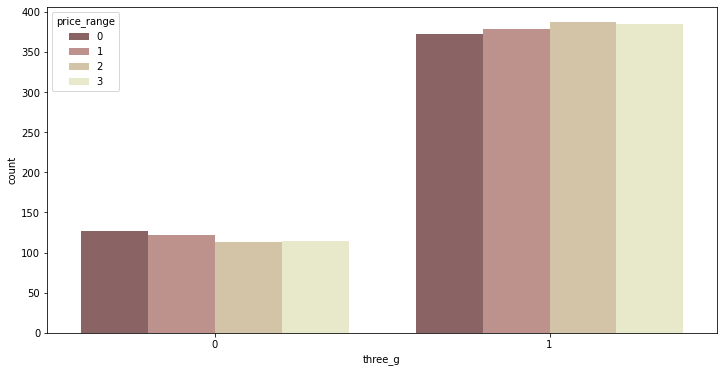

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data_train['three_g'], hue=data_train['price_range'], palette="pink")
plt.show()

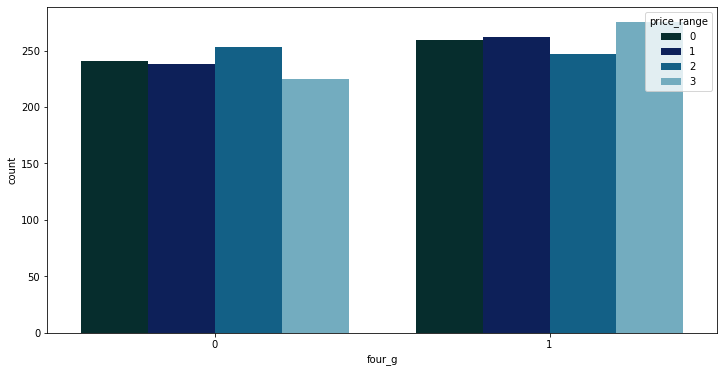

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data_train['four_g'], hue=data_train['price_range'], palette="ocean")
plt.show()

From 3G and 4G count plot we can see that large number of devices are not having 4G features but having 3G feature.

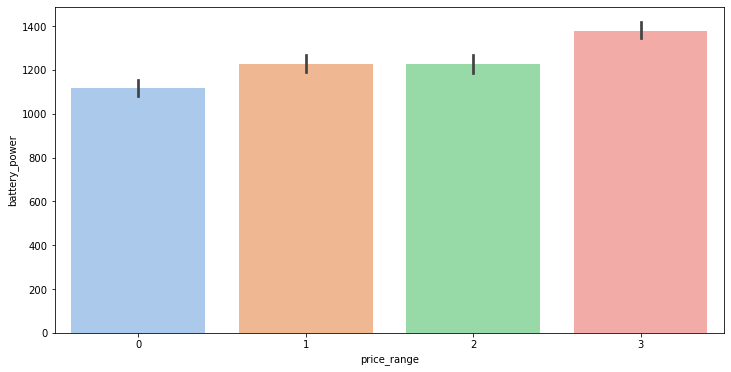

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range', y='battery_power', data=data_train, palette='pastel')
plt.show()

In the above graph we made bar graph for relation between price range and battery power

Now, moving forward, lets plot line graph to display relation between price range and internal memory with respect to dual sim feature

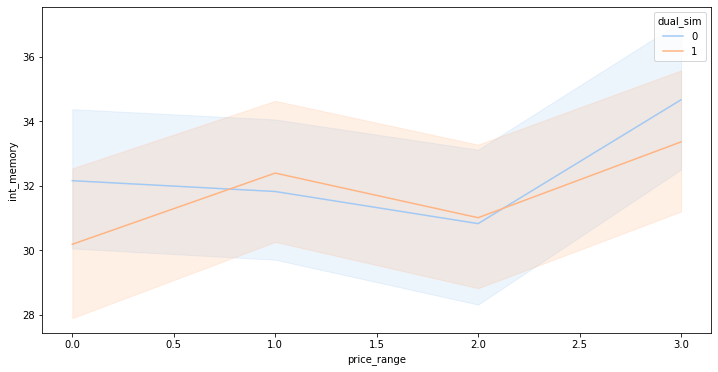

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(x='price_range', y='int_memory', data=data_train, hue='dual_sim', palette='pastel')
plt.show()

 # 

### 4. Preprocessing Data

We will pre process data to work with

In [16]:
x = data_train.drop(['price_range'], axis=1)
y = data_train['price_range']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# 


###  5. Train the Model using Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [19]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
dt.score(x_train, y_train)

1.0

In [21]:
predictions = dt.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.845

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[135,  16,   0,   0],
       [ 10, 110,  15,   0],
       [  0,  15, 117,  19],
       [  0,   0,  18, 145]], dtype=int64)

We can see that we used Decision tree to train our model and predict target variable. We achieved 84.5 percent accuracy is pretty good. Now next step is to predicting values for test data.

# 

### 6. Predicting values for test.csv

In [24]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


We have to remove the ID column, because there was no id column in train.csv 

In [26]:
data_test = data_test.drop(['id'], axis=1)

In [27]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [28]:
test_predictions = dt.predict(data_test)

In [29]:
data_test['predicted_price'] = test_predictions

In [30]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


This is how we trained our decision tree model, tested accuracy of the model and predicted target value for test.csv and saved predicted price column in the data_test